Ignoring line: 40

[(0.060562, 0.942934), (0.394229, 0.471144), (0.937219, 0.932889), (0.243591, 0.259056), (0.33806, 0.929149), (0.245617, 0.986246), (0.58785, 0.48826), (0.771818, 0.894098), (0.741888, 0.639771), (0.009128, 0.923038), (0.054042, 0.064156), (0.289258, 0.296086), (0.319255, 0.956349), (0.805218, 0.569889), (0.213761, 0.375533), (0.128785, 0.437189), (0.381072, 0.512592), (0.42095, 0.205079), (0.814813, 0.384201), (0.502155, 0.050541), (0.709357, 0.081568), (0.574503, 0.302022), (0.039253, 0.098582), (0.100408, 0.434016), (0.834228, 0.454153), (0.242461, 0.508993), (0.675943, 0.33227), (0.726183, 0.599843), (0.13635, 0.803325), (0.231589, 0.907479), (0.93307, 0.184902), (0.646404, 0.56121), (0.537232, 0.940763), (0.958013, 0.488955), (0.196986, 0.135021), (0.740817, 0.742469), (0.478621, 0.561161), (0.183073, 0.825718), (0.134909, 0.072343), (0.188435, 0.594701)]
Best Order: [35, 33, 18, 26, 21, 17, 19, 20, 30, 11, 22, 10, 38, 34, 3, 14, 39, 28, 9, 0, 8, 27, 13, 24, 31,

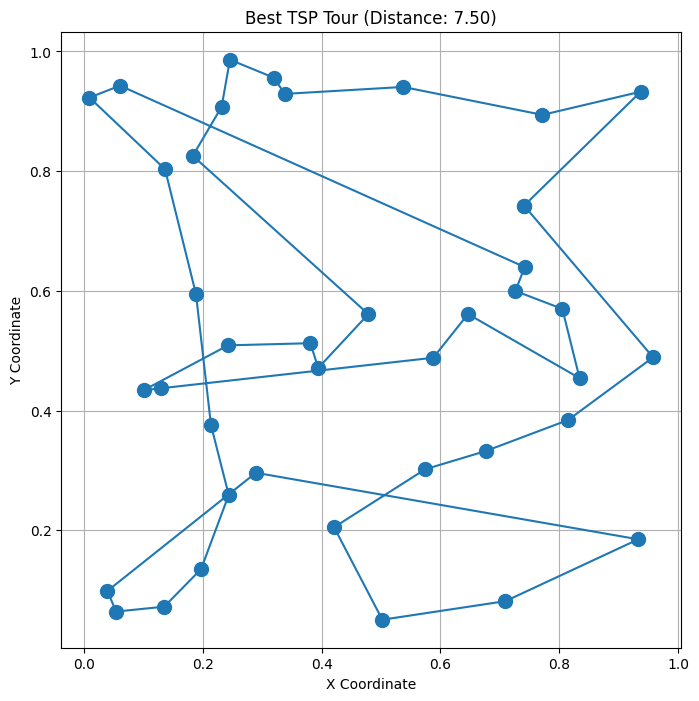

In [1]:
import matplotlib.pyplot as plt
import random
import math
def parse_input_file(file_path):
    # Initialize an empty list to store the cities
    cities = []

    try:
        # Open the file in read mode
        with open(file_path, 'r') as file:
            # Read each line from the file
            lines = file.readlines()
            for line in lines:
                break
            # Iterate over each line
            for line in lines:
                # Split each line into two floats and create a tuple
                parts = line.strip().split()

                # Check if the line has two parts
                if len(parts) == 2:
                    x, y = map(float, parts)
                    cities.append((x, y))
                else:
                    # Print a message ignoring the line if it doesn't have two parts
                    print("Ignoring line:", line)

    # Catch FileNotFoundError if the file is not found
    except FileNotFoundError:
        print(f"File not found: {file_path}")

    # Catch any other exception that might occur
    except Exception as e:
        print("An error occurred:", e)
    #print (list(cities))
    # Return the list of cities
    return list(cities)
def distance(cities, cityorder):
    # Total distance traveled
    total_distance = 0
    # Loop through each city in the order given
    for i in range(len(cityorder) - 1):
        # Add the distance between the current city and the next city to the total
        total_distance += ((cities[cityorder[i]][0] - cities[cityorder[i + 1]][0])**2 + (cities[cityorder[i]][1] - cities[cityorder[i + 1]][1])**2)**0.5
    # Add the distance between the last city and the first city to the total
    total_distance += ((cities[cityorder[-1]][0] - cities[cityorder[0]][0])**2 + (cities[cityorder[-1]][1] - cities[cityorder[0]][1])**2)**0.5
    # Return the total distance
    return total_distance
def simulated_annealing(cities, initial_order, initial_temperature, cooling_rate, max_iterations):

    # Initialize current solution and distance
    current_order = initial_order
    current_distance = distance(cities, current_order)
    improvement=[]

    # Initialize best solution and distance
    best_order = current_order
    best_distance = current_distance
    # Iterate over a fixed number of iterations
    for _ in range(max_iterations):

        # Generate a neighboring solution by swapping two cities
        neighbor_order = current_order[:]
        index1, index2 = random.sample(range(len(cities)), 2)
        neighbor_order[index1], neighbor_order[index2] = neighbor_order[index2], neighbor_order[index1]

        # Calculate the distance of the neighboring solution
        neighbor_distance = distance(cities, neighbor_order)

        # Calculate the change in distance
        delta_distance = neighbor_distance - current_distance

        # Accept the neighboring solution if it's better or with a certain probability
        if delta_distance < 0 or random.random() < math.exp(-delta_distance / initial_temperature):
            current_order = neighbor_order
            current_distance = neighbor_distance

            # Update the best solution if needed
            if current_distance < best_distance:
                best_order = current_order
                best_distance = current_distance
                improvement.append(best_distance)

        # Reduce the temperature
        initial_temperature *= cooling_rate

    return best_order, best_distance,improvement
# Example usage:

    # Create a list of cities with (x, y) coordinates
#
cities = [(0.060562, 0.942934), (0.394229, 0.471144), (0.937219, 0.932889), (0.243591, 0.259056), (0.33806, 0.929149), (0.245617, 0.986246), (0.58785, 0.48826), (0.771818, 0.894098), (0.741888, 0.639771), (0.009128, 0.923038), (0.054042, 0.064156), (0.289258, 0.296086), (0.319255, 0.956349), (0.805218, 0.569889), (0.213761, 0.375533), (0.128785, 0.437189), (0.381072, 0.512592), (0.42095, 0.205079), (0.814813, 0.384201), (0.502155, 0.050541), (0.709357, 0.081568), (0.574503, 0.302022), (0.039253, 0.098582), (0.100408, 0.434016), (0.834228, 0.454153), (0.242461, 0.508993), (0.675943, 0.33227), (0.726183, 0.599843), (0.13635, 0.803325), (0.231589, 0.907479), (0.93307, 0.184902), (0.646404, 0.56121), (0.537232, 0.940763), (0.958013, 0.488955), (0.196986, 0.135021), (0.740817, 0.742469), (0.478621, 0.561161), (0.183073, 0.825718), (0.134909, 0.072343), (0.188435, 0.594701)]#[(0, 0), (1, 2), (2, 2), (3, 1), (1, 1),(5,5),(3,7),(2,7),(1,3)]

    # Generate an initial order of cities (you can use a random order)
initial_order = list(range(len(cities)))
random.shuffle(initial_order)
    # Parameters for simulated annealing
initial_temperature = 1000.0
cooling_rate = 0.995
max_iterations = 10000000



cities=parse_input_file('tsp40.txt')#please enter correct path
print (cities)
    # Solve TSP using simulated annealing
best_order, best_distance,improvement = simulated_annealing(cities, initial_order, initial_temperature, cooling_rate, max_iterations)

print("Best Order:", best_order)
print("Best Distance:", best_distance)
improvement=[((improvement[i+1]-improvement[i])*(-100))/improvement[i] for i in range (len(improvement)-1)]
print (improvement)
x, y = zip(*[cities[i] for i in best_order])
x += (x[0],)  # Close the loop by adding the first city at the end
y += (y[0],)

plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='o', linestyle='-', markersize=10)
plt.title(f"Best TSP Tour (Distance: {best_distance:.2f})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.grid(True)

# Show the plot
plt.show()